# HW02

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg'). 

Use only the following columns:

- 'engine_displacement', 
- 'horsepower', 
- 'vehicle_weight', 
- 'model_year', 
- 'fuel_efficiency_mpg' 

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
)

### EDA
- Look at the fuel_efficiency_mpg variable. Does it have a long tail?

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
# check dtypes
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

There are many words with empty space" "  
we need to replace them with "-" into str method, so that we can 

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [7]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

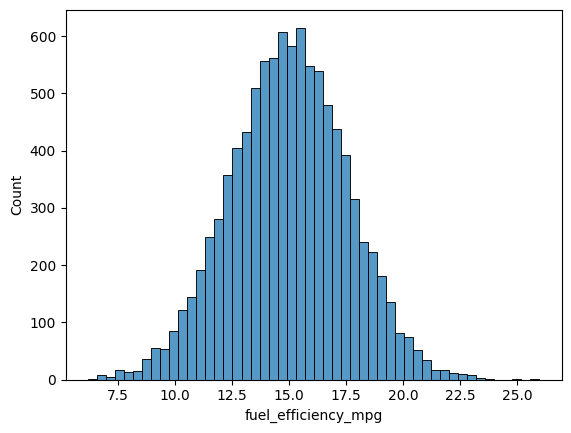

In [8]:
# to check "fuel_efficiency_mpg" whether have long tail
sns.histplot(df.fuel_efficiency_mpg, bins=50)

### => The variable "fuel_efficiency_mpg" does not have long tail, it's normal distribution

## Question 1
There's one column with missing values. What is it? 

A. 'engine_displacement'  
B. 'horsepower'  
C. 'vehicle_weight'  
D. 'model_year'

In [9]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

### Q1 Ans is 'horsepower' (B)

## Question 2
What's the median (50% percentile) for variable 'horsepower'?

A. 49  
B. 99  
C. 149  
D. 199

In [10]:
df.horsepower.median()

np.float64(149.0)

### Q2 Ans is 149 (C)

## Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.  

Use the same code as in the lectures

In [11]:
# randam the dataset with seed 42
np.random.seed(42)

In [12]:
# check how many data
n = len(df)
n

9704

In [13]:
# splitting the dataset for val(20%), test(20%), train(60%)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
print("n_val:", n_val)
print("n_test:", n_test)
print("n_train:", n_train)

n_val: 1940
n_test: 1940
n_train: 5824


In [14]:
# to make a series list
idx = np.arange(n)

# to shuffle the list
np.random.shuffle(idx)

# use the random index to relocate the dataframe
df_shuffled = df.iloc[idx]

In [15]:
# to create new random shuffled dataset for train, val, test
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val :].copy()

In [16]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,usa,gasoline,all-wheel_drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,asia,diesel,front-wheel_drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,asia,diesel,front-wheel_drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,usa,gasoline,all-wheel_drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,usa,gasoline,all-wheel_drive,NaN,19.402209


In [17]:
df_val.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
6163,180,0.0,112.0,2772.134410,15.9,2020,europe,gasoline,front-wheel_drive,3.0,15.366341
3313,260,5.0,138.0,3014.061530,NaN,2022,europe,gasoline,front-wheel_drive,-2.0,14.601182
4781,140,7.0,181.0,3652.186151,NaN,2016,usa,diesel,all-wheel_drive,1.0,12.247032
8210,270,4.0,105.0,2753.040847,16.3,2023,asia,gasoline,front-wheel_drive,0.0,15.136400
6713,170,4.0,224.0,4163.375137,11.9,2003,usa,gasoline,front-wheel_drive,0.0,10.340419


In [18]:
df_test.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
3729,140,11.0,148.0,2704.826005,18.9,2017,usa,diesel,all-wheel_drive,0.0,15.804354
7764,210,4.0,136.0,3001.227490,14.9,2004,europe,diesel,front-wheel_drive,NaN,14.272374
4358,210,NaN,152.0,3747.467392,13.7,2021,usa,gasoline,front-wheel_drive,1.0,11.748441
5922,190,2.0,128.0,2705.833636,16.7,2014,asia,diesel,front-wheel_drive,0.0,16.485991
1343,230,1.0,156.0,2505.939657,17.5,2005,asia,diesel,all-wheel_drive,1.0,17.779704


## Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?  

Options:

A. With 0  
B. With mean  
C. Both are equally good

In [19]:
# First, we need to select ONLY the features we are using for the model
base = ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]

# to make y_train and y_val for model training
# Note: we are predicting 'fuel_efficiency_mpg', so we use it as our target variable 'y'
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values

# delete the target variable from the dataframes
del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]

In [20]:
# define the function for training linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [21]:
# define the function for calculating RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

### Q3 fill na with 0

In [22]:
# prepare the feature matrix using only the 'base' columns and fill missing values with 0
X_train_zero = df_train[base].fillna(0).values

# train the linear regression model
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

# prepare the validation feature matrix
X_val_zero = df_val[base].fillna(0).values

# make predictions on the validation data
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

# calculate the RMSE score
rmse_zero = rmse(y_val, y_pred_zero)
print(f"RMSE with zeros: {round(rmse_zero, 2)}")

RMSE with zeros: 0.52


### Q3 fill na with mean

In [23]:
# calculate the mean of the 'horsepower' column from the training data
mean_horsepower = df_train.horsepower.mean()
print(f"Mean horsepower from training data: {mean_horsepower}")

# prepare the feature matrix using 'base' columns and filling with the calculated mean
X_train_mean = df_train[base].fillna(mean_horsepower).values

# train the linear regression model
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

# prepare the validation feature matrix, also using the training mean
X_val_mean = df_val[base].fillna(mean_horsepower).values

# make predictions on the validation data
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

# calculate the RMSE score
rmse_mean = rmse(y_val, y_pred_mean)
print(f"RMSE with mean: {round(rmse_mean, 2)}")

Mean horsepower from training data: 149.54476367006487
RMSE with mean: 0.46


### Q3 Ans is with mean (B)

# Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.  
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].  
- Use RMSE to evaluate the model on the validation dataset.  
- Round the RMSE scores to 2 decimal digits.  
- Which r gives the best RMSE?  
- If multiple options give the same best RMSE, select the smallest r.  

Options:  

A. 0  
B. 0.01  
C. 1  
D. 10  
E. 100

In [24]:
# define the function for training regularized linear regression
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [25]:
# prepare data by selecting 'base' columns and filling missing values with 0
X_train = df_train[base].fillna(0).values
X_val = df_val[base].fillna(0).values

In [26]:
# iterate through different values of r
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f"r = {r:<4}, RMSE = {round(score, 2)}")

r = 0   , RMSE = 0.52
r = 0.01, RMSE = 0.52
r = 0.1 , RMSE = 0.52
r = 1   , RMSE = 0.52
r = 5   , RMSE = 0.52
r = 10  , RMSE = 0.52
r = 100 , RMSE = 0.52


### Q4 Ans is 0 (A), since whether how r small or large, the RMSE keep the same

# Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

A. 0.001  
B. 0.006  
C. 0.060  
D. 0.600  

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [27]:
# initialize a list to store RMSE scores
rmse_scores = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [28]:
for seed in seeds:
    np.random.seed(seed)

    # shuffle and split the dataset for each seed
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values

    del df_train["fuel_efficiency_mpg"]
    del df_val["fuel_efficiency_mpg"]

    # prepare data using only 'base' columns and train a non-regularized model
    X_train = df_train[base].fillna(0).values
    X_val = df_val[base].fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    rmse_scores.append(score)
    print(f"Seed = {seed}, RMSE = {score:.3f}")

Seed = 0, RMSE = 0.521
Seed = 1, RMSE = 0.521
Seed = 2, RMSE = 0.523
Seed = 3, RMSE = 0.516
Seed = 4, RMSE = 0.511
Seed = 5, RMSE = 0.528
Seed = 6, RMSE = 0.531
Seed = 7, RMSE = 0.509
Seed = 8, RMSE = 0.515
Seed = 9, RMSE = 0.513


In [33]:
# calculate the standard deviation of the scores
std_deviation = np.std(rmse_scores)
print(f"\nStandard Deviation of RMSE scores: {round(std_deviation, 5)}")


Standard Deviation of RMSE scores: 0.00699


### Q5 Ans is 0.006 (B), which is the most close to std_deviation 0.007

# Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?
Options:  

A. 0.15  
B. 0.515  
C. 5.15  
D. 51.5  

In [ ]:
# split the data with seed 9
np.random.seed(9)
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val :].copy()

In [35]:
# combine train and validation datasets
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate(
    [df_train.fuel_efficiency_mpg.values, df_val.fuel_efficiency_mpg.values]
)

# prepare the full training data (X) using only 'base' columns
del df_full_train["fuel_efficiency_mpg"]
X_full_train = df_full_train[base].fillna(0).values

In [36]:
# train the regularized model with r=0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# prepare the test data and make predictions
y_test = df_test.fuel_efficiency_mpg.values
del df_test["fuel_efficiency_mpg"]
X_test = df_test[base].fillna(0).values
y_pred = w0 + X_test.dot(w)

# calculate RMSE on the test set
test_rmse = rmse(y_test, y_pred)
print(f"RMSE on the test dataset: {round(test_rmse, 3)}")

RMSE on the test dataset: 0.516


### Q6 Ans is 0.515 (B), which is most close to 0.516